<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#2-Nodes" data-toc-modified-id="2-Nodes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>2 Nodes</a></span><ul class="toc-item"><li><span><a href="#initial-setup" data-toc-modified-id="initial-setup-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>initial setup</a></span></li><li><span><a href="#new-init" data-toc-modified-id="new-init-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>new init</a></span></li></ul></li><li><span><a href="#10-Nodes" data-toc-modified-id="10-Nodes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>10 Nodes</a></span></li></ul></div>

# Goal

We have **expectation** with the new init that currently are not met
- essentially breaking the lower limit on balance norm

There are currently two problems: 
- Cost increasing **SOLVED**
- Not knowing whether the initialization actually provides a feasible point. **SOLVED**

The second point is addressed in another notebook, for 2 Nodes only.

# Conclusions

Current conclusions: 
- We are properly initializing I believe, with the costs behaving appropriately. 
- We have to test on larger number of nodes to see if there is an improvement

It does not help it getting "perfect" rebalancing. I have to assess that on 3 nodes or 5 nodes first... Because it works perfectly on 2 Nodes...

# Load

In [50]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import pandas as pd

from amod_ed.result_analysis import plot_ri, print_final_flows, plot_cost_all_path, plot_ri_list, plot_balance_list
from amod_ed.result_analysis import plot_stop_and_cost

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
subfolder='unstucking_balance'

# 2 Nodes

## initial setup

In [19]:
n_nodes=2

In [20]:
path='Data/'+str(n_nodes)+'Nodes_back2basics/outputs/'+subfolder

In [21]:
print(os.listdir(path))

['new_init.pkl', 'initial_setup.pkl']


In [22]:
filename=os.listdir(path)[1]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

initial_setup.pkl


In [23]:
opt_res1 = opt_res

In [24]:
params

{'L': 10000,
 'ni': 1000,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

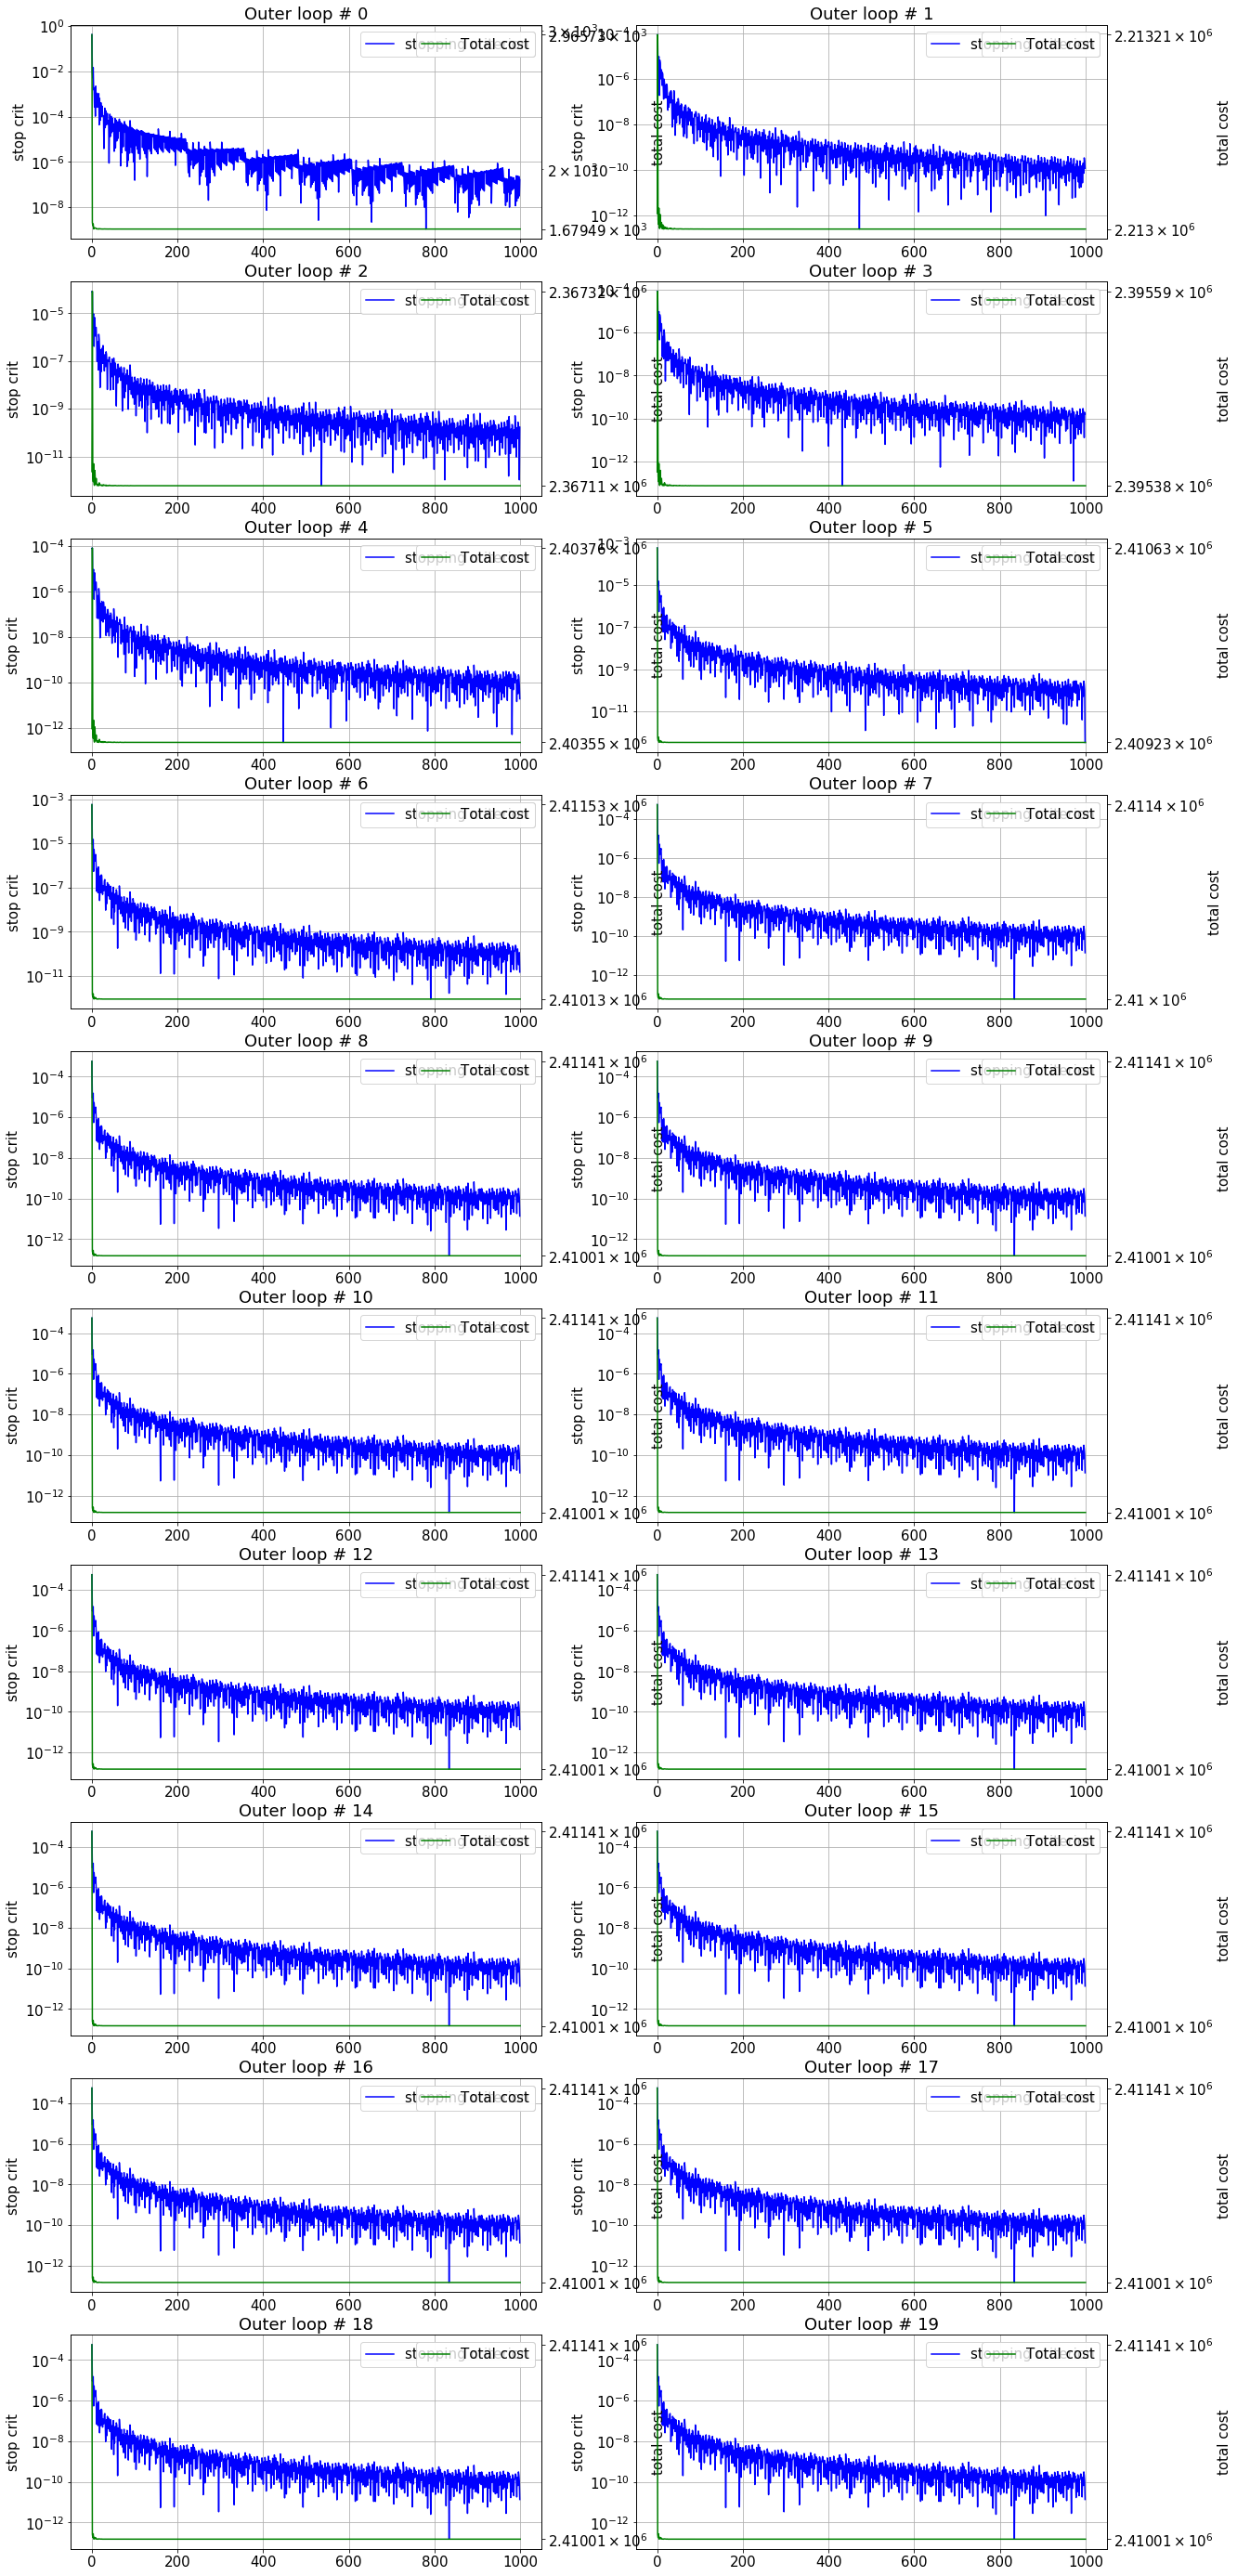

In [25]:
plot_stop_and_cost(opt_res)

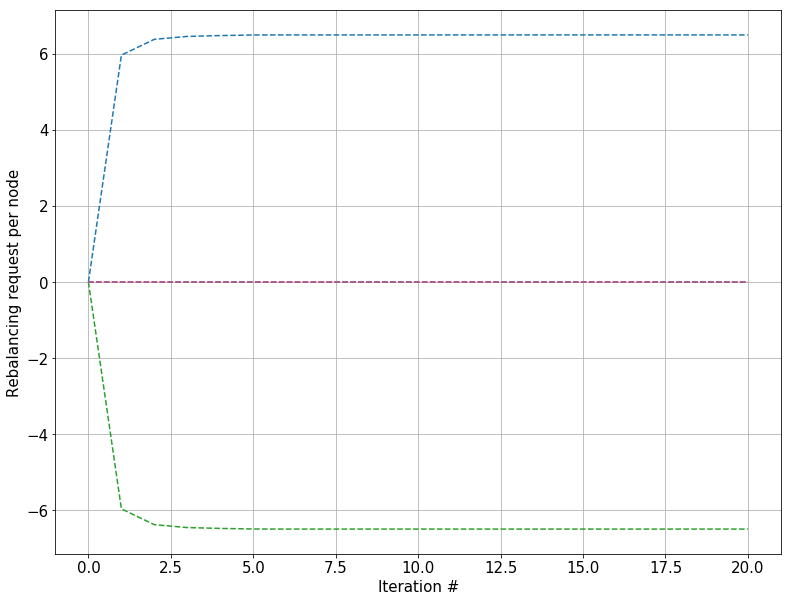

In [26]:
plot_ri_list(ri_FW, save = False, path = None)

/Users/lucasfuentes/ASL/ICU/amod_ed/result_analysis.py:309: RuntimeWarning: divide by zero encountered in double_scalars
  r_p.append(np.abs(balance_list[n][k]-balance_list[n][k+1])/balance_list[n][k])


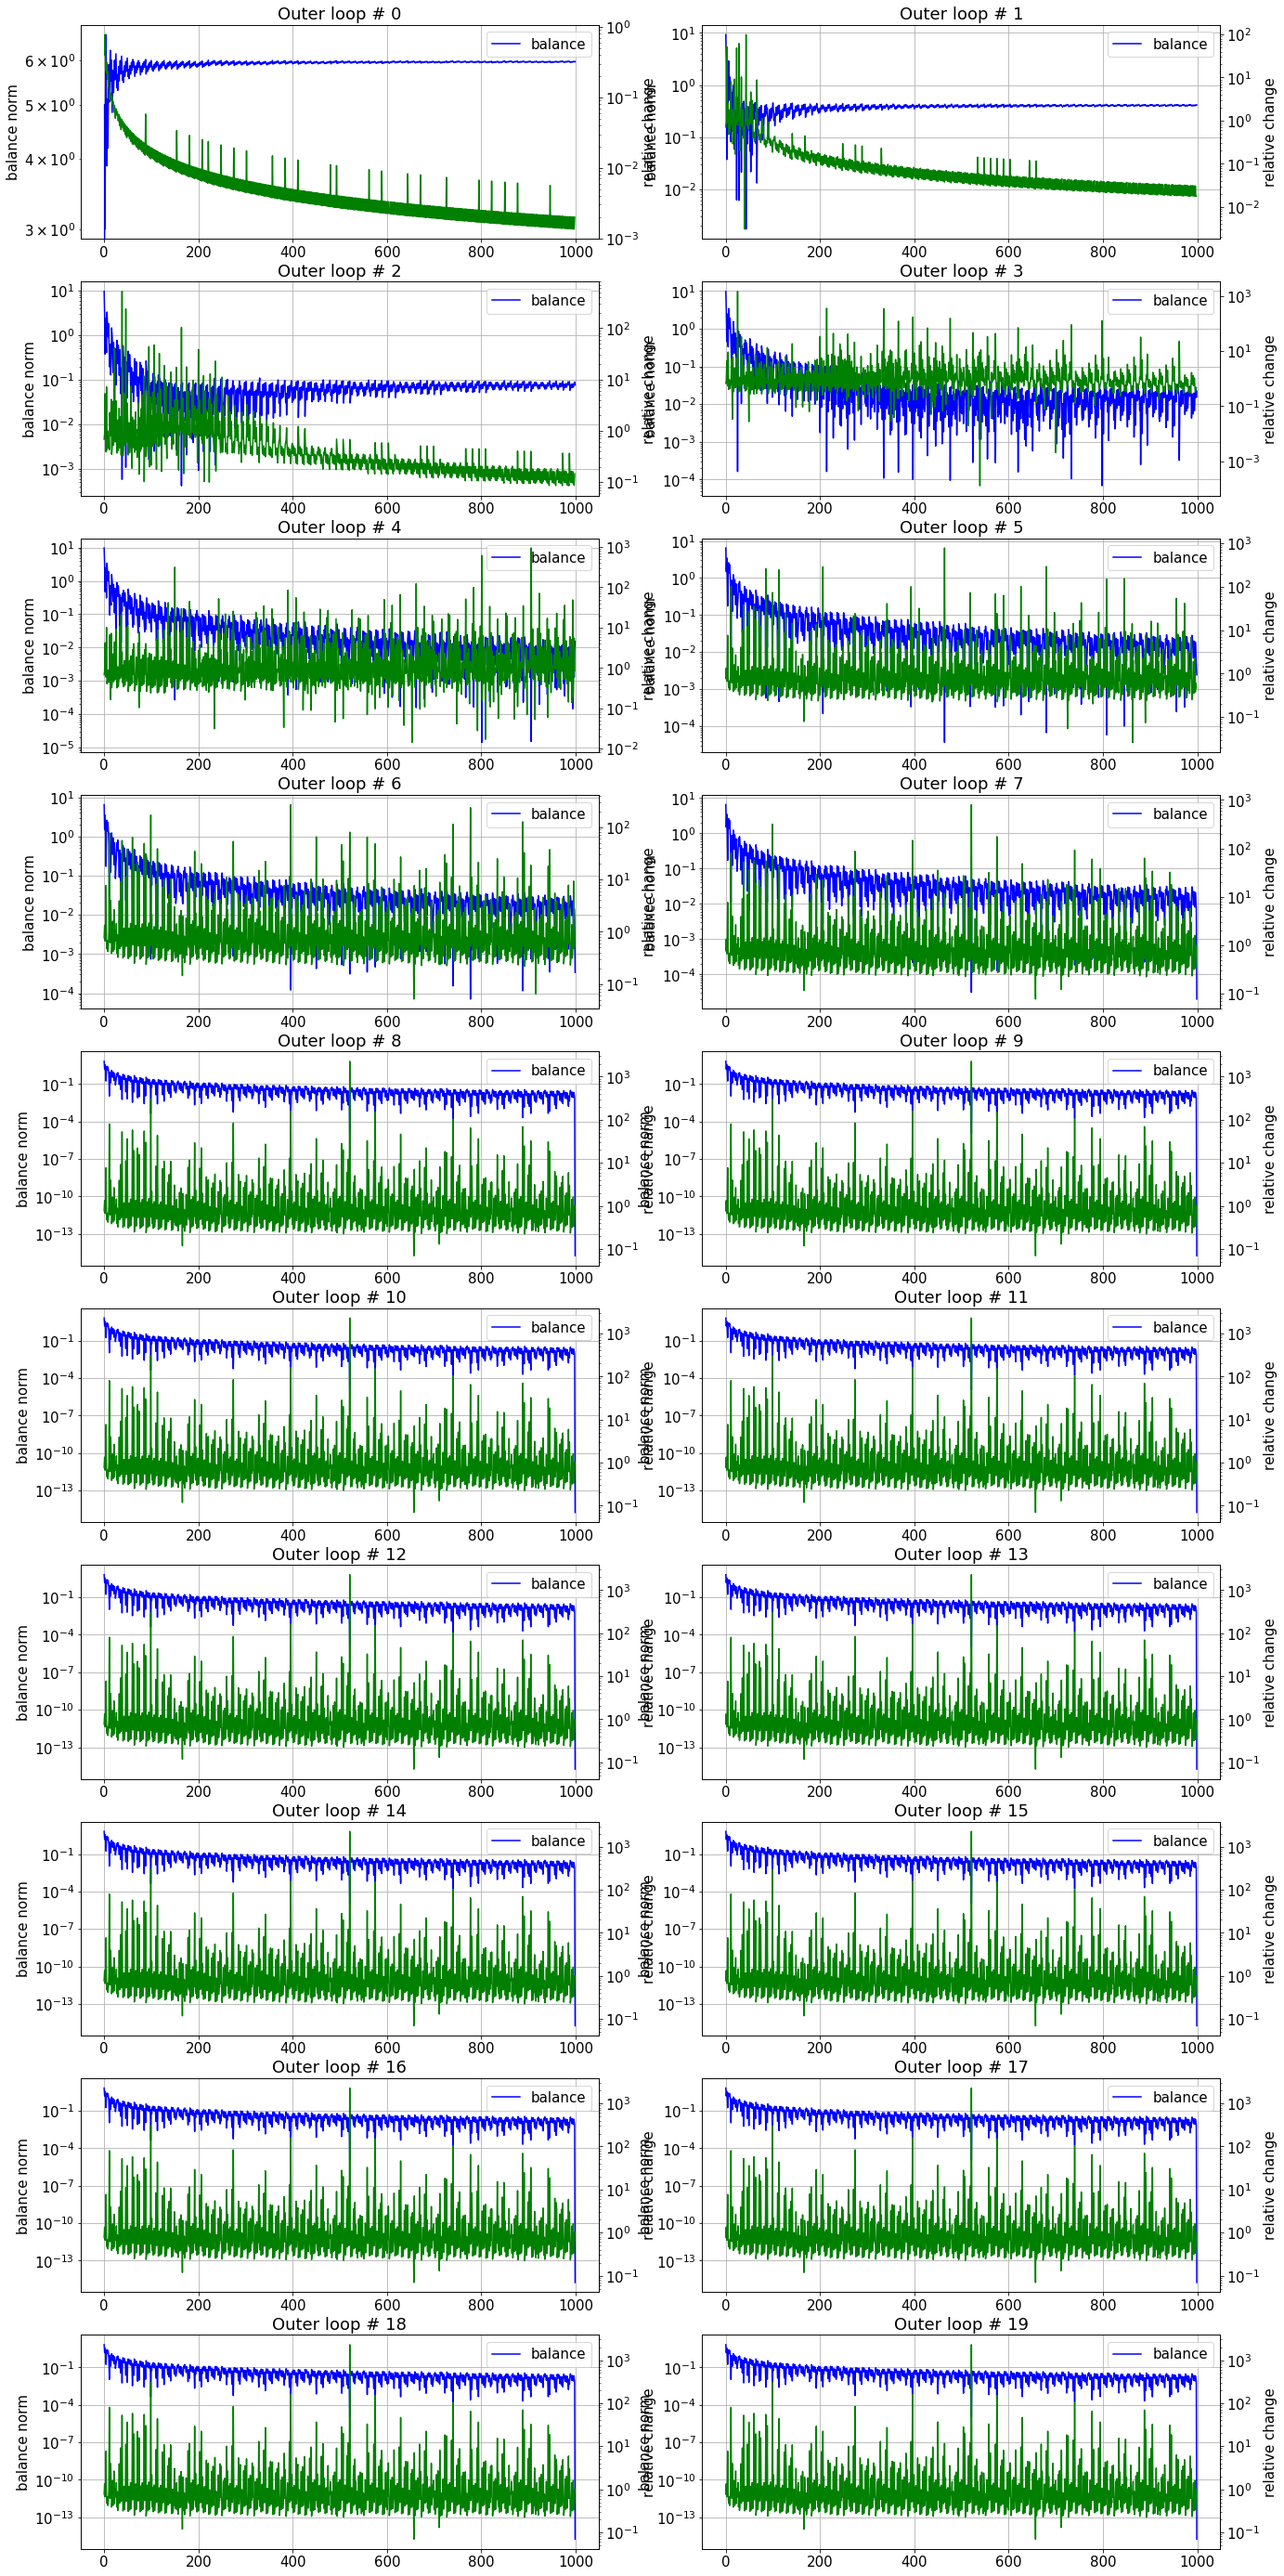

In [27]:
plot_balance_list(balance_list, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

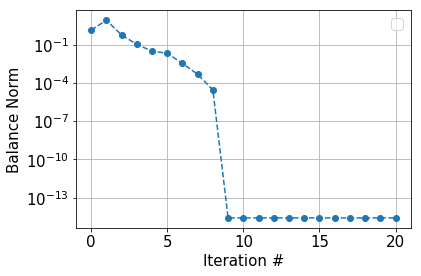

In [28]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

In [29]:
print_final_flows(G_FW[-1])


('0', '1')  :  9.275056281044291
('0', 'R')  :  6.494304099094499
('0', '1_p')  :  2.780752181949789
('0', '0_p')  :  0.7249437189556943
('1', '0')  :  9.27505628104429
('1', 'R')  :  0.0
('1', '0_p')  :  9.275056281044291
('1', '1_p')  :  7.219247818050208


In [30]:
#Maybe a question of cost of rebalancing edges
G = G_FW[-1][-1]
for e in G.edges():
    print(e, G[e[0]][e[1]]['k'], G[e[0]][e[1]]['cost'], G[e[0]][e[1]]['tot_cost'])

('0', '1') 10.0 39.99631740232384 341.31523988228855
('0', 'R') 6.494304099094502 413999.9999999999 2408087.9599442403
('0', '1_p') 3.0 47.98618901149442 124.57001676406617
('0', '0_p') 1.0 88.0 63.7950472681011
('1', '0') 10.0 39.99631740232383 341.31523988228844
('1', 'R') 1e-06 10000000000000000000000 nan
('1', '0_p') 10.0 47.99631740232384 415.51569013064284
('1', '1_p') 1.0 88.0 635.2938079884183


The costs are properly assigned and we see that there is no cost to edge 1->R, simply because the capacity is deemed too low. 


In [31]:
G_ref=G_FW[-1][-1]

path1=['0', '0_p']
path2=['0','1','0_p']


costs=[]

for path in [path1, path2]:
    c=0
    for i in range(len(path)-1):
        o=path[i]
        d=path[i+1]
        c+=G_ref[o][d]['cost']
    costs.append(c)
        

In [32]:
costs

[88.0, 87.99263480464768]

Do the costs match for the initial initialization? 

In [33]:
for i in range(4):
    G = G_FW[-1][i]
    print("---------------------------------")
    print("Graph #: ", i)
    print("OBJ: ", opt_res[-1]['obj'][i])
    tc = 0
    for e in G.edges():
        print(e, G[e[0]][e[1]]['k'], G[e[0]][e[1]]['cost'], G[e[0]][e[1]]['tot_cost'])
        if not np.isnan(G[e[0]][e[1]]['tot_cost']):
            tc+=G[e[0]][e[1]]['tot_cost']
    print("total cost check: ", tc)
    

---------------------------------
Graph #:  0
OBJ:  2411408.542356374
('0', '1') 10.0 41.4 370.8
('0', 'R') 6.494304099094502 413999.99999999994 2408087.959944241
('0', '1_p') 3.0 710.6666666666669 1773.3333333333335
('0', '0_p') 1.0 88.0 0.0
('1', '0') 10.0 75.96959509178663 725.6490787997229
('1', 'R') 1e-06 10000000000000000000000 nan
('1', '0_p') 10.0 49.4 450.8
('1', '1_p') 1.0 88.0 0.0
total cost check:  2411408.542356374
---------------------------------
Graph #:  1
OBJ:  2410043.8981952276
('0', '1') 10.0 36.06666666666666 120.04444444444447
('0', 'R') 6.494304099094502 414000.00000000006 2408087.9599442417
('0', '1_p') 3.0 52.23045267489712 152.15363511659808
('0', '0_p') 1.0 88.0 586.6666666666666
('1', '0') 10.0 41.037212392578944 363.6957269802818
('1', 'R') 1e-06 10000000000000000000000 nan
('1', '0_p') 10.0 44.06666666666666 146.7111111111111
('1', '1_p') 1.0 88.0 586.6666666666666
total cost check:  2410043.8981952276
---------------------------------
Graph #:  2
OBJ:  2

## new init

In [34]:
n_nodes=2

In [35]:
path='Data/'+str(n_nodes)+'Nodes_back2basics/outputs/'+subfolder

In [36]:
print(os.listdir(path))

['new_init.pkl', 'initial_setup.pkl']


In [37]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

new_init.pkl


In [38]:
params

{'L': 10000,
 'ni': 1000,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

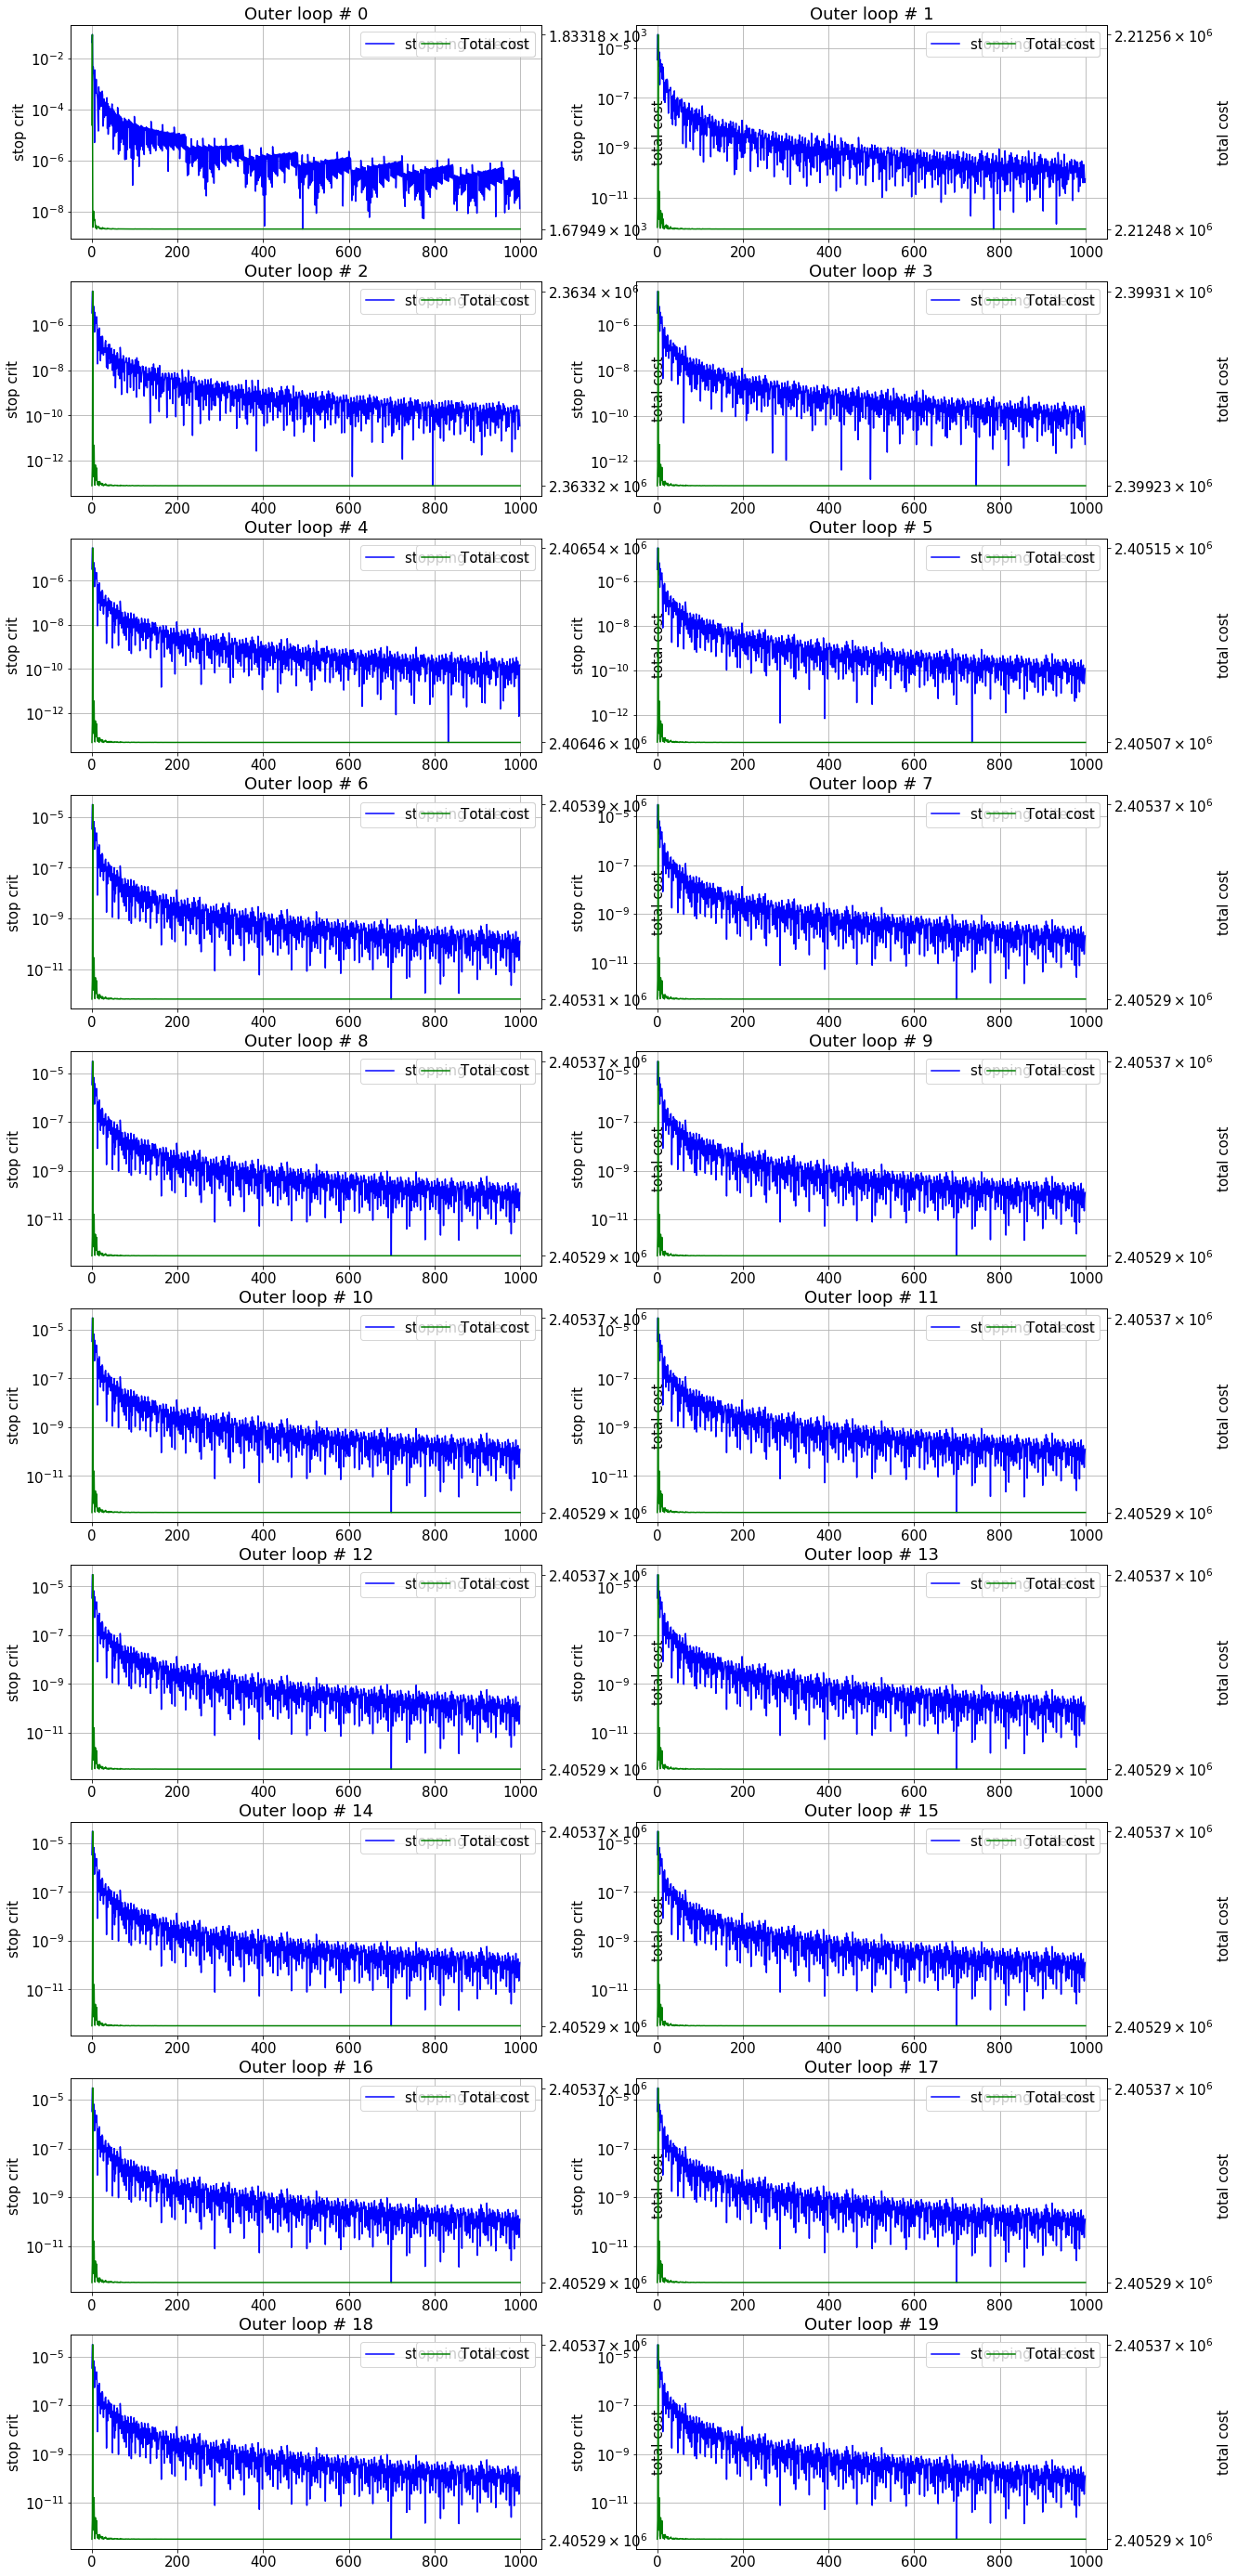

In [39]:
plot_stop_and_cost(opt_res)

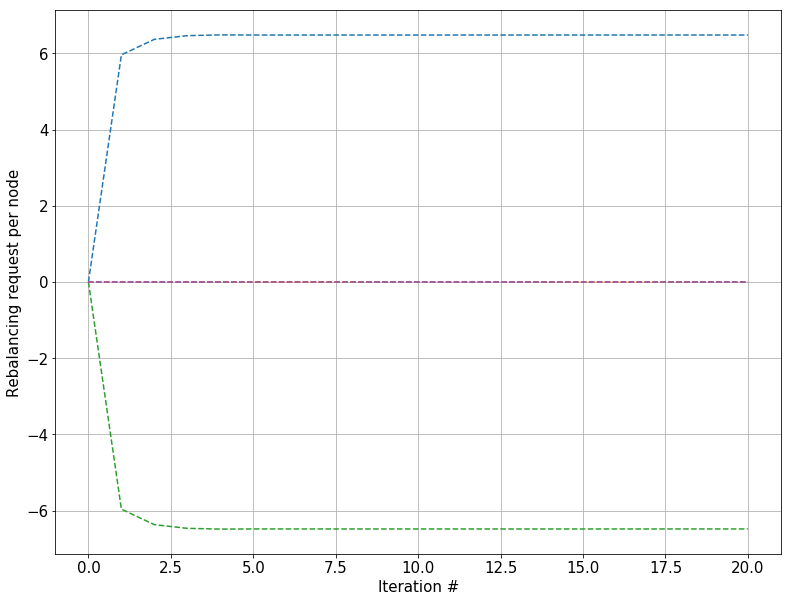

In [40]:
plot_ri_list(ri_FW, save = False, path = None)

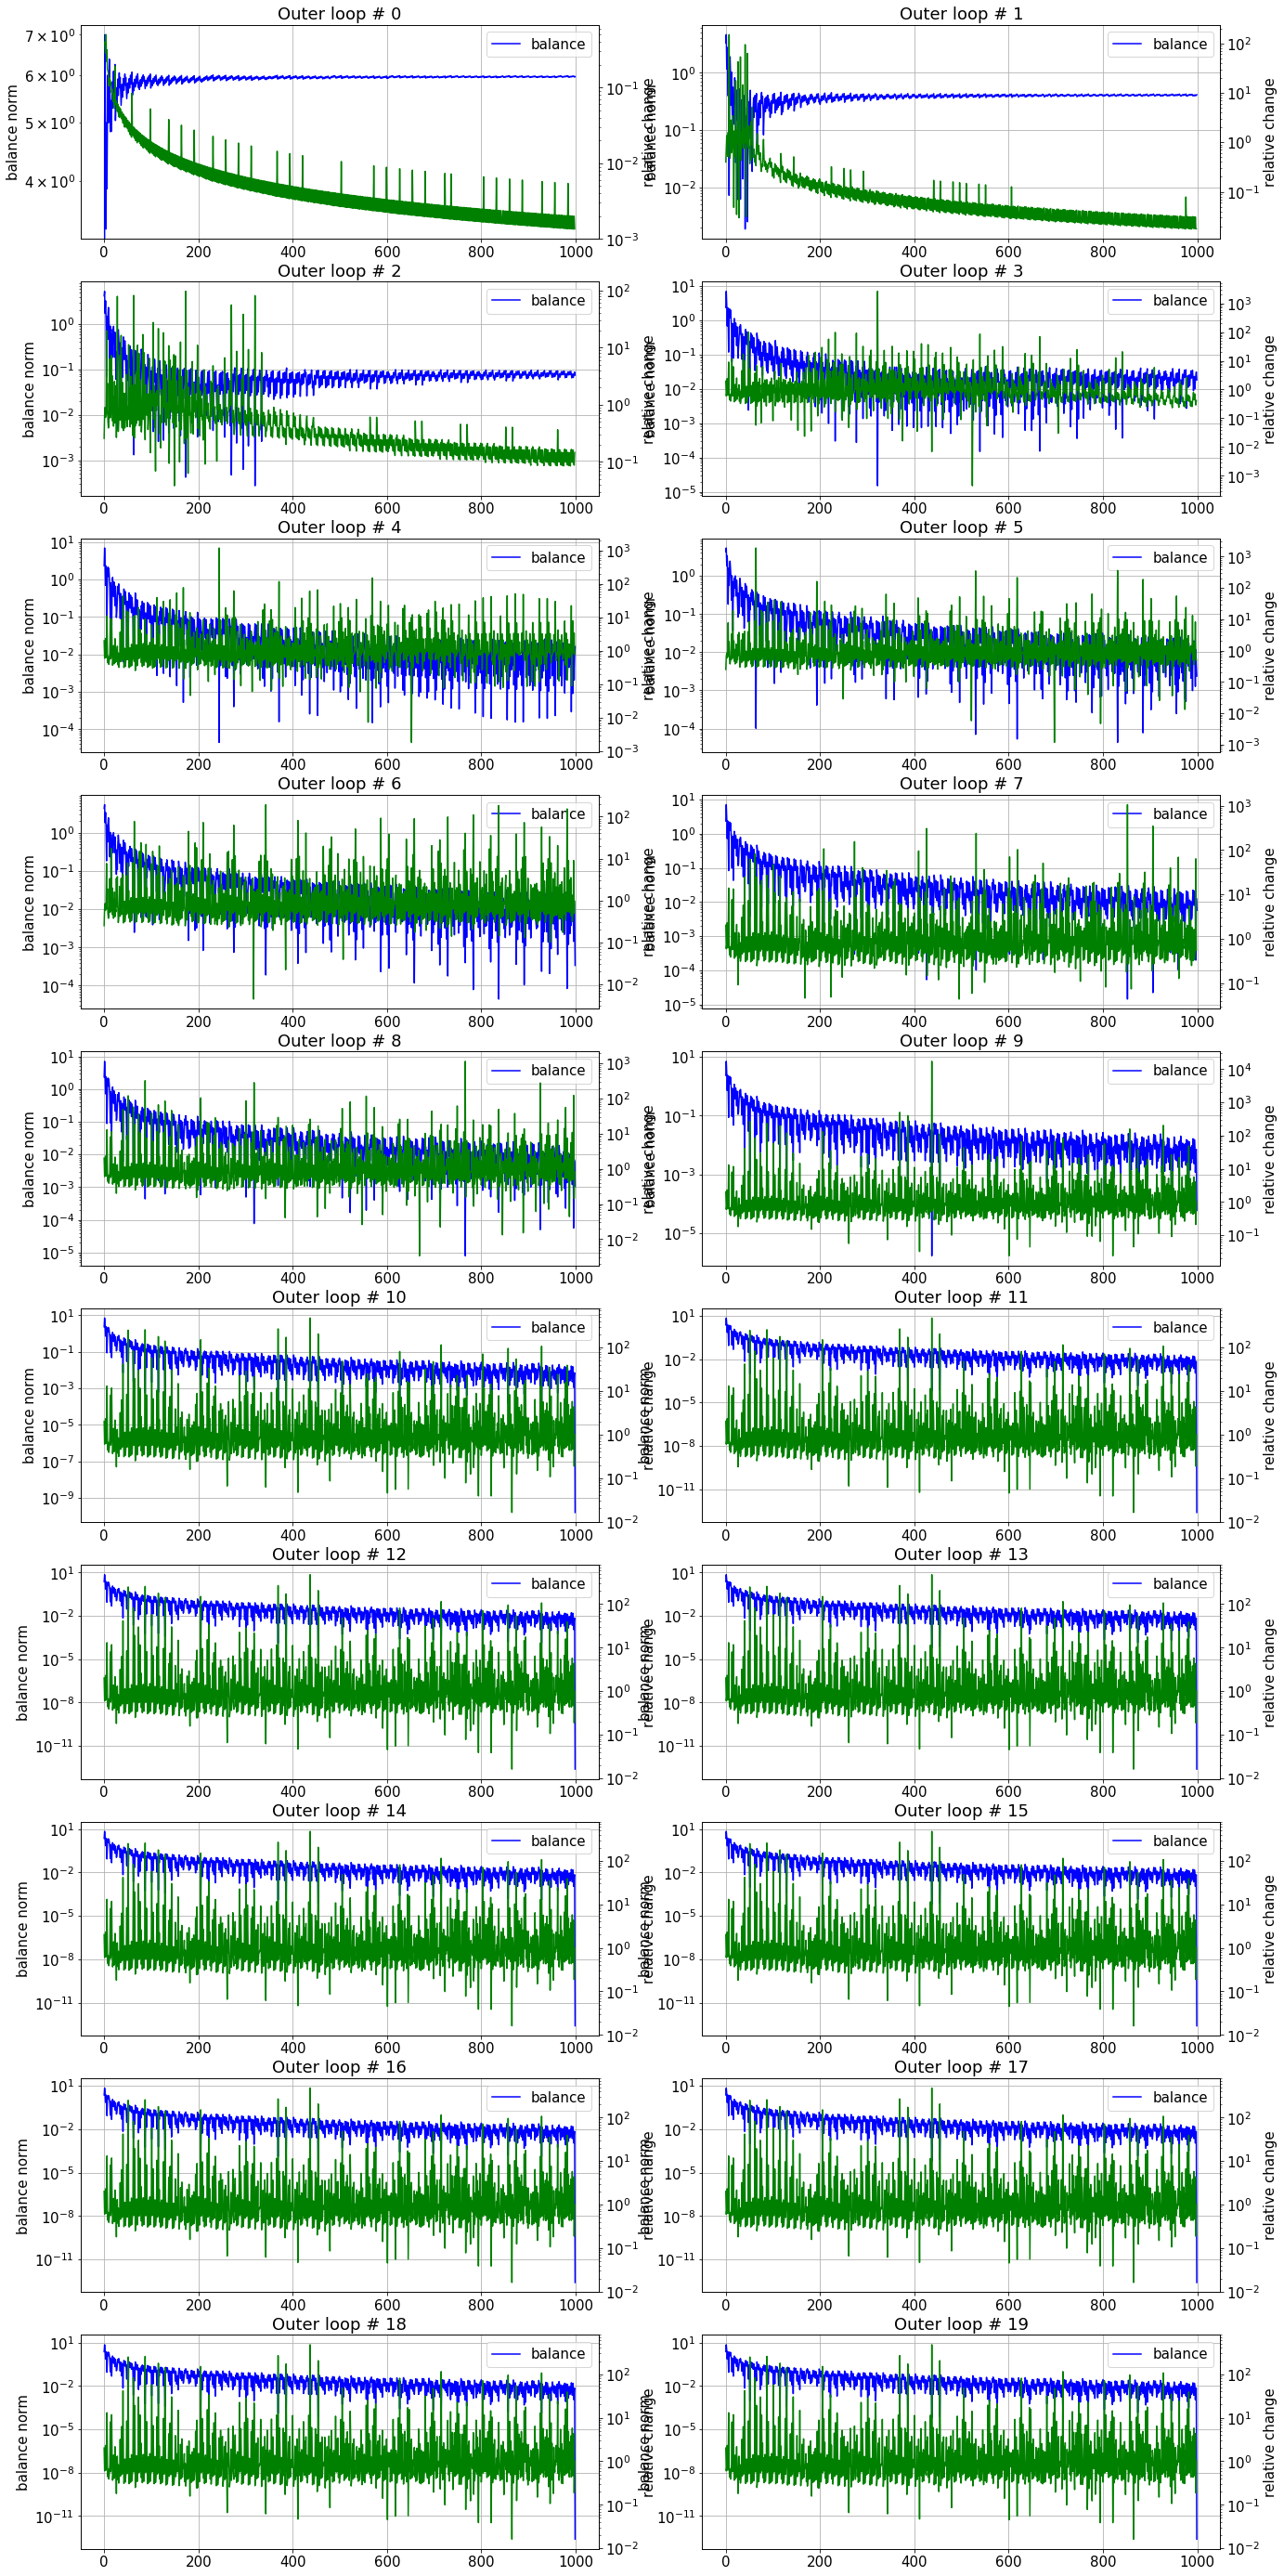

In [206]:
plot_balance_list(balance_list, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

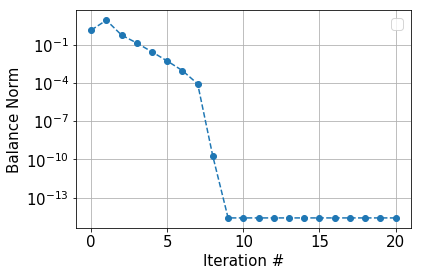

In [41]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

In [42]:
print_final_flows(G_FW[-1])


('0', '1')  :  9.271206380857432
('0', 'R')  :  6.481575274177471
('0', '1_p')  :  2.7896311066799595
('0', '0_p')  :  0.7287936191425722
('1', '0')  :  9.27120638085743
('1', 'R')  :  0.0
('1', '0_p')  :  9.271206380857432
('1', '1_p')  :  7.210368893320038


In [43]:
#Maybe a question of cost of rebalancing edges
G = G_FW[-1][-1]
for e in G.edges():
    print(e, G[e[0]][e[1]]['k'], G[e[0]][e[1]]['cost'], G[e[0]][e[1]]['tot_cost'])

('0', '1') 10.0 39.98968634974497 341.16127081954266
('0', 'R') 6.481575274177473 413999.99999999994 2403368.1116650063
('0', '1_p') 3.0 48.03734487981944 124.99630926694608
('0', '0_p') 1.0 88.0 64.13383848454636
('1', '0') 10.0 39.98968634974497 341.1612708195426
('1', 'R') 1e-06 10000000000000000000000 nan
('1', '0_p') 10.0 47.98968634974497 415.33092186640204
('1', '1_p') 1.0 88.0 634.5124626121634


We see we have the same behavior here. 

In [44]:
G_ref=G_FW[-1][-1]

path1=['0', '0_p']
path2=['0','1','0_p']


costs=[]

for path in [path1, path2]:
    c=0
    for i in range(len(path)-1):
        o=path[i]
        d=path[i+1]
        c+=G_ref[o][d]['cost']
    costs.append(c)
        

In [45]:
costs

[88.0, 87.97937269948994]

In [46]:
for i in range(4):
    G = G_FW[-1][i]
    print("---------------------------------")
    print("Graph #: ", i)
    print("OBJ: ", opt_res[-1]['obj'][i])
    tc = 0
    for e in G.edges():
        print(e, G[e[0]][e[1]]['k'], G[e[0]][e[1]]['cost'], G[e[0]][e[1]]['tot_cost'])
        if not np.isnan(G[e[0]][e[1]]['tot_cost']):
            tc+=G[e[0]][e[1]]['tot_cost']
    print("total cost check: ", tc)
    

---------------------------------
Graph #:  0
OBJ:  2405289.4077388463
('0', '1') 10.0 39.98968634980823 341.1612708210123
('0', 'R') 6.481575274177473 413999.9999999973 2403368.111664974
('0', '1_p') 3.0 48.03734487981944 124.99630926694608
('0', '0_p') 1.0 88.0 64.13383848454636
('1', '0') 10.0 39.98968634980808 341.1612708210089
('1', 'R') 1e-06 10000000000000000000000 nan
('1', '0_p') 10.0 47.98968634974497 415.33092186640204
('1', '1_p') 1.0 88.0 634.5124626121634
total cost check:  2405289.4077388463
---------------------------------
Graph #:  1
OBJ:  2405297.477964335
('0', '1') 10.0 40.894081846753636 360.8048552228177
('0', 'R') 6.481575274177473 413999.99999999907 2403368.111664996
('0', '1_p') 3.0 44.04984376394839 40.9238592789317
('0', '0_p') 1.0 88.0 21.377946161515453
('1', '0') 10.0 37.62932241957793 269.2274122329701
('1', 'R') 1e-06 10000000000000000000000 nan
('1', '0_p') 10.0 48.89408184672906 438.86140557127004
('1', '1_p') 1.0 88.0 798.1708208707211
total cost che

The cost correpondance is restored, but it is monotonically increasing now... 

In [47]:
for i in range(10):
    print(opt_res[-1]['obj'][i])

2405289.4077388463
2405297.477964335
2405370.570536443
2405297.866139278
2405293.163645784
2405306.6735113356
2405290.8644241244
2405289.5896101664
2405298.397992601
2405294.629887366


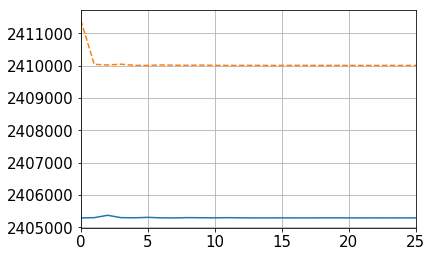

In [49]:
plt.figure()
plt.plot(opt_res[-1]['obj'])
plt.plot(opt_res1[-1]['obj'], '--')
plt.xlim([0,25])
plt.grid()

# 10 Nodes

In [51]:
n_nodes=10

In [52]:
path='Data/'+str(n_nodes)+'Nodes/outputs/'+subfolder

In [53]:
print(os.listdir(path))

['ni_to_10000.pkl', 'init_passengers.pkl', 'initial_setup.pkl', 'ni_to_5000.pkl', 'init_nearest.pkl']


In [54]:
filename=os.listdir(path)[-1]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

init_nearest.pkl


In [55]:
params

{'L': 10000,
 'ni': 1000,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

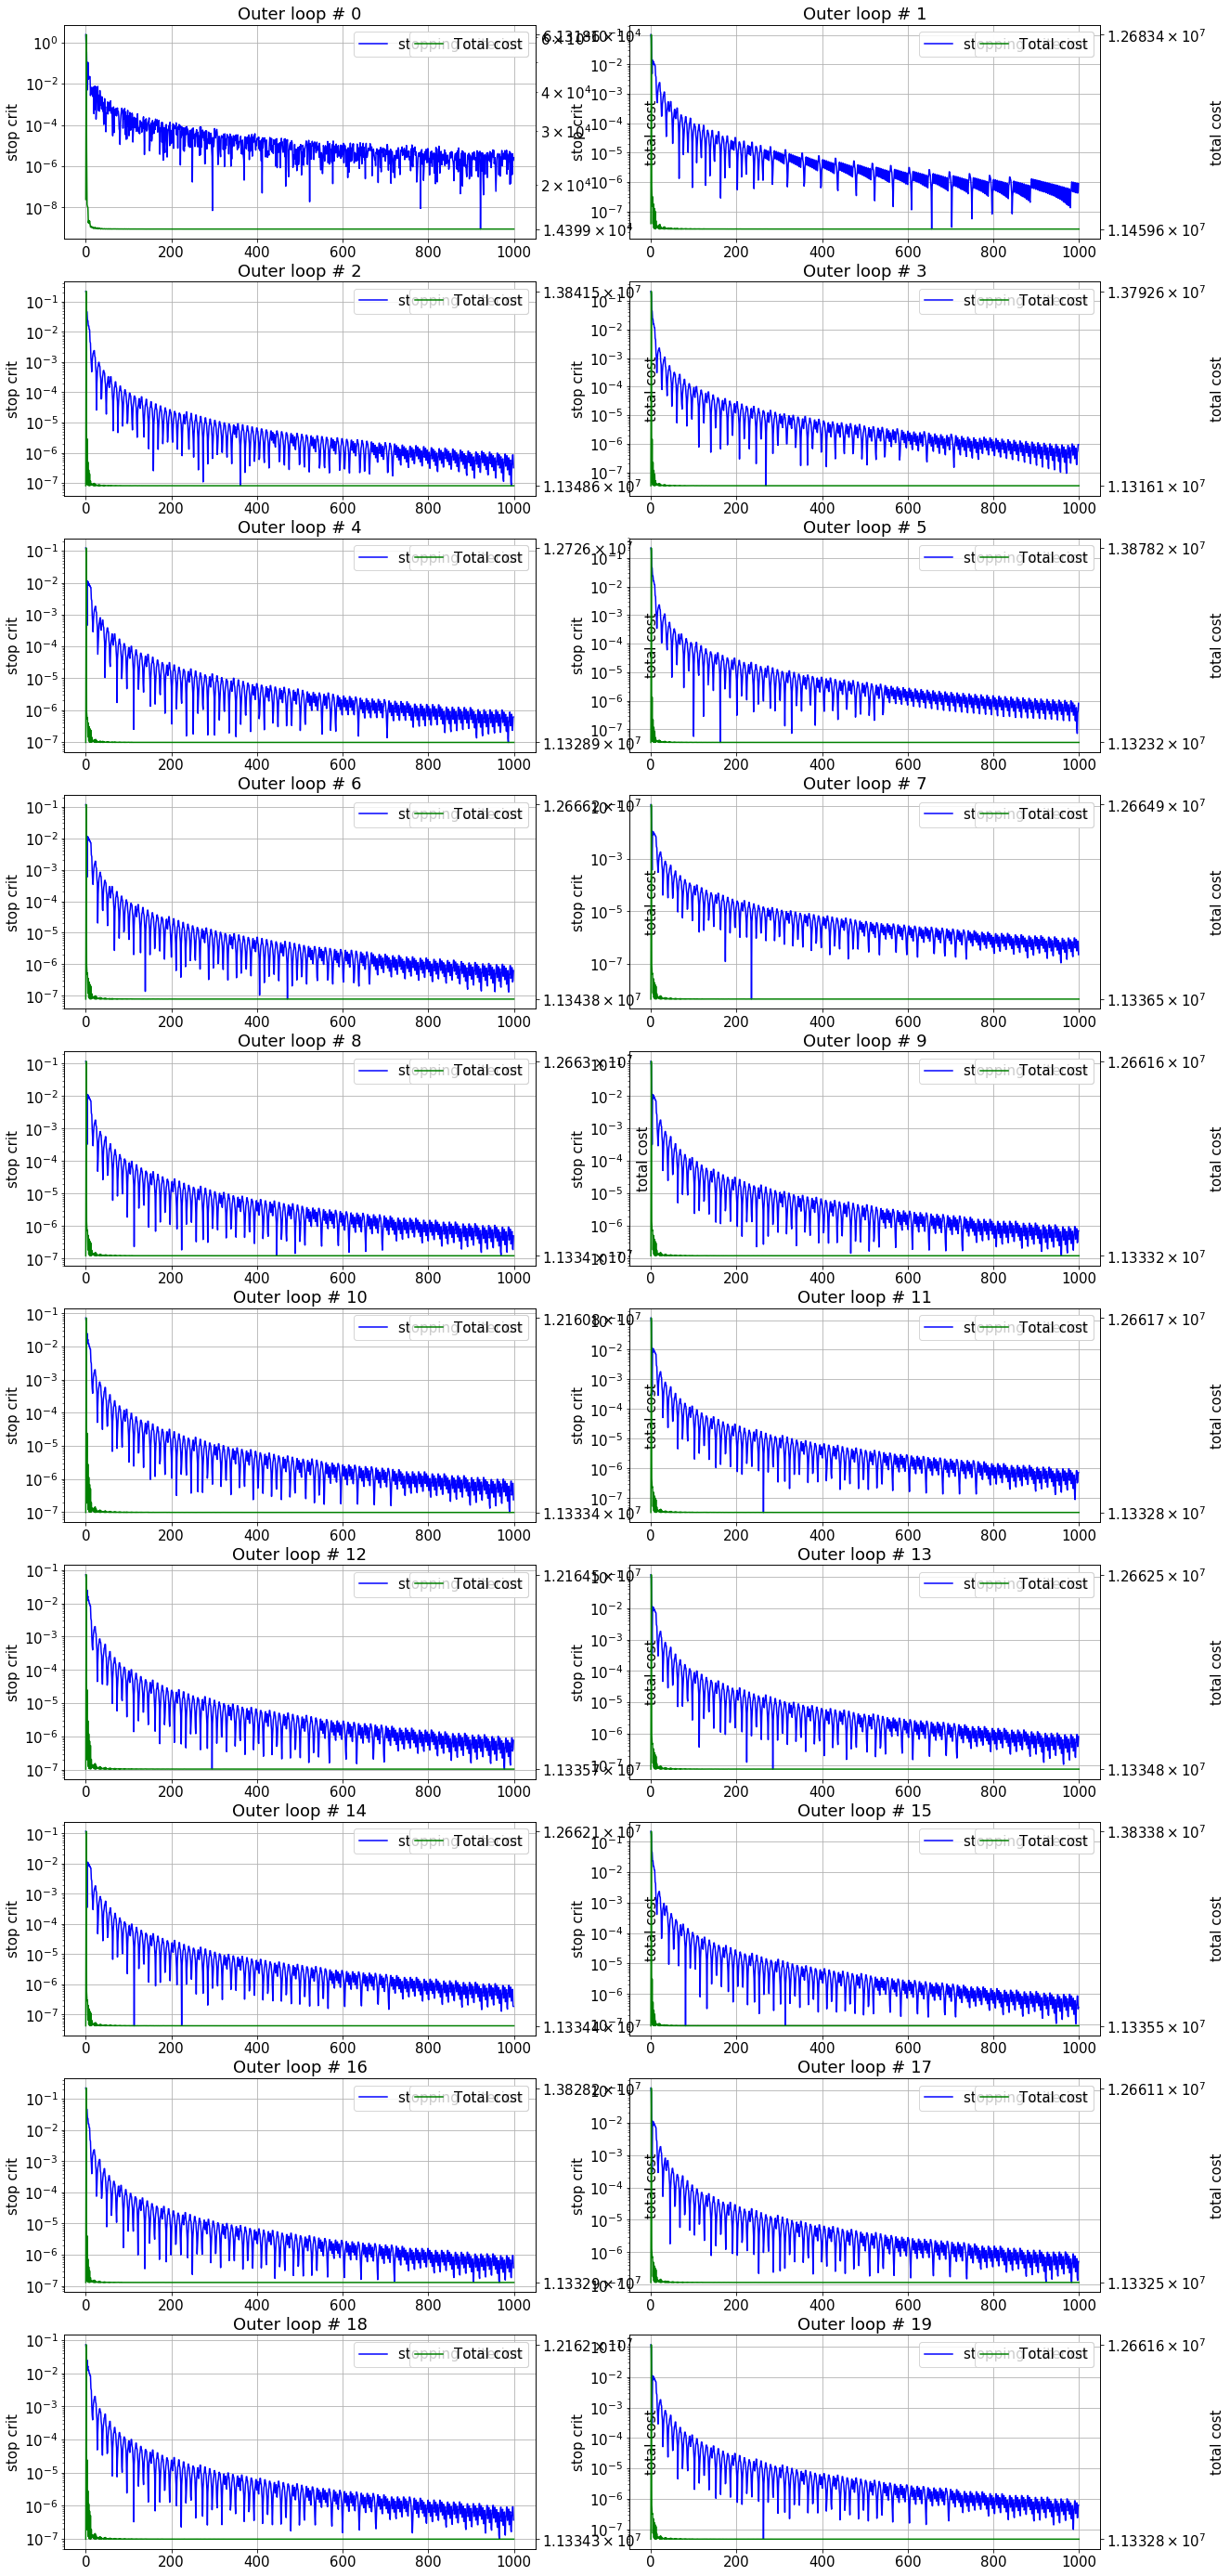

In [56]:
plot_stop_and_cost(opt_res)

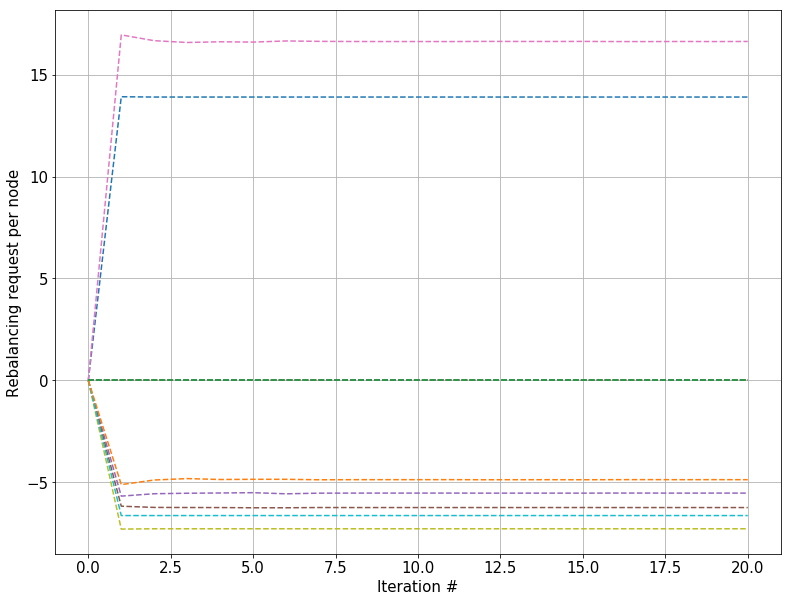

In [57]:
plot_ri_list(ri_FW, save = False, path = None)

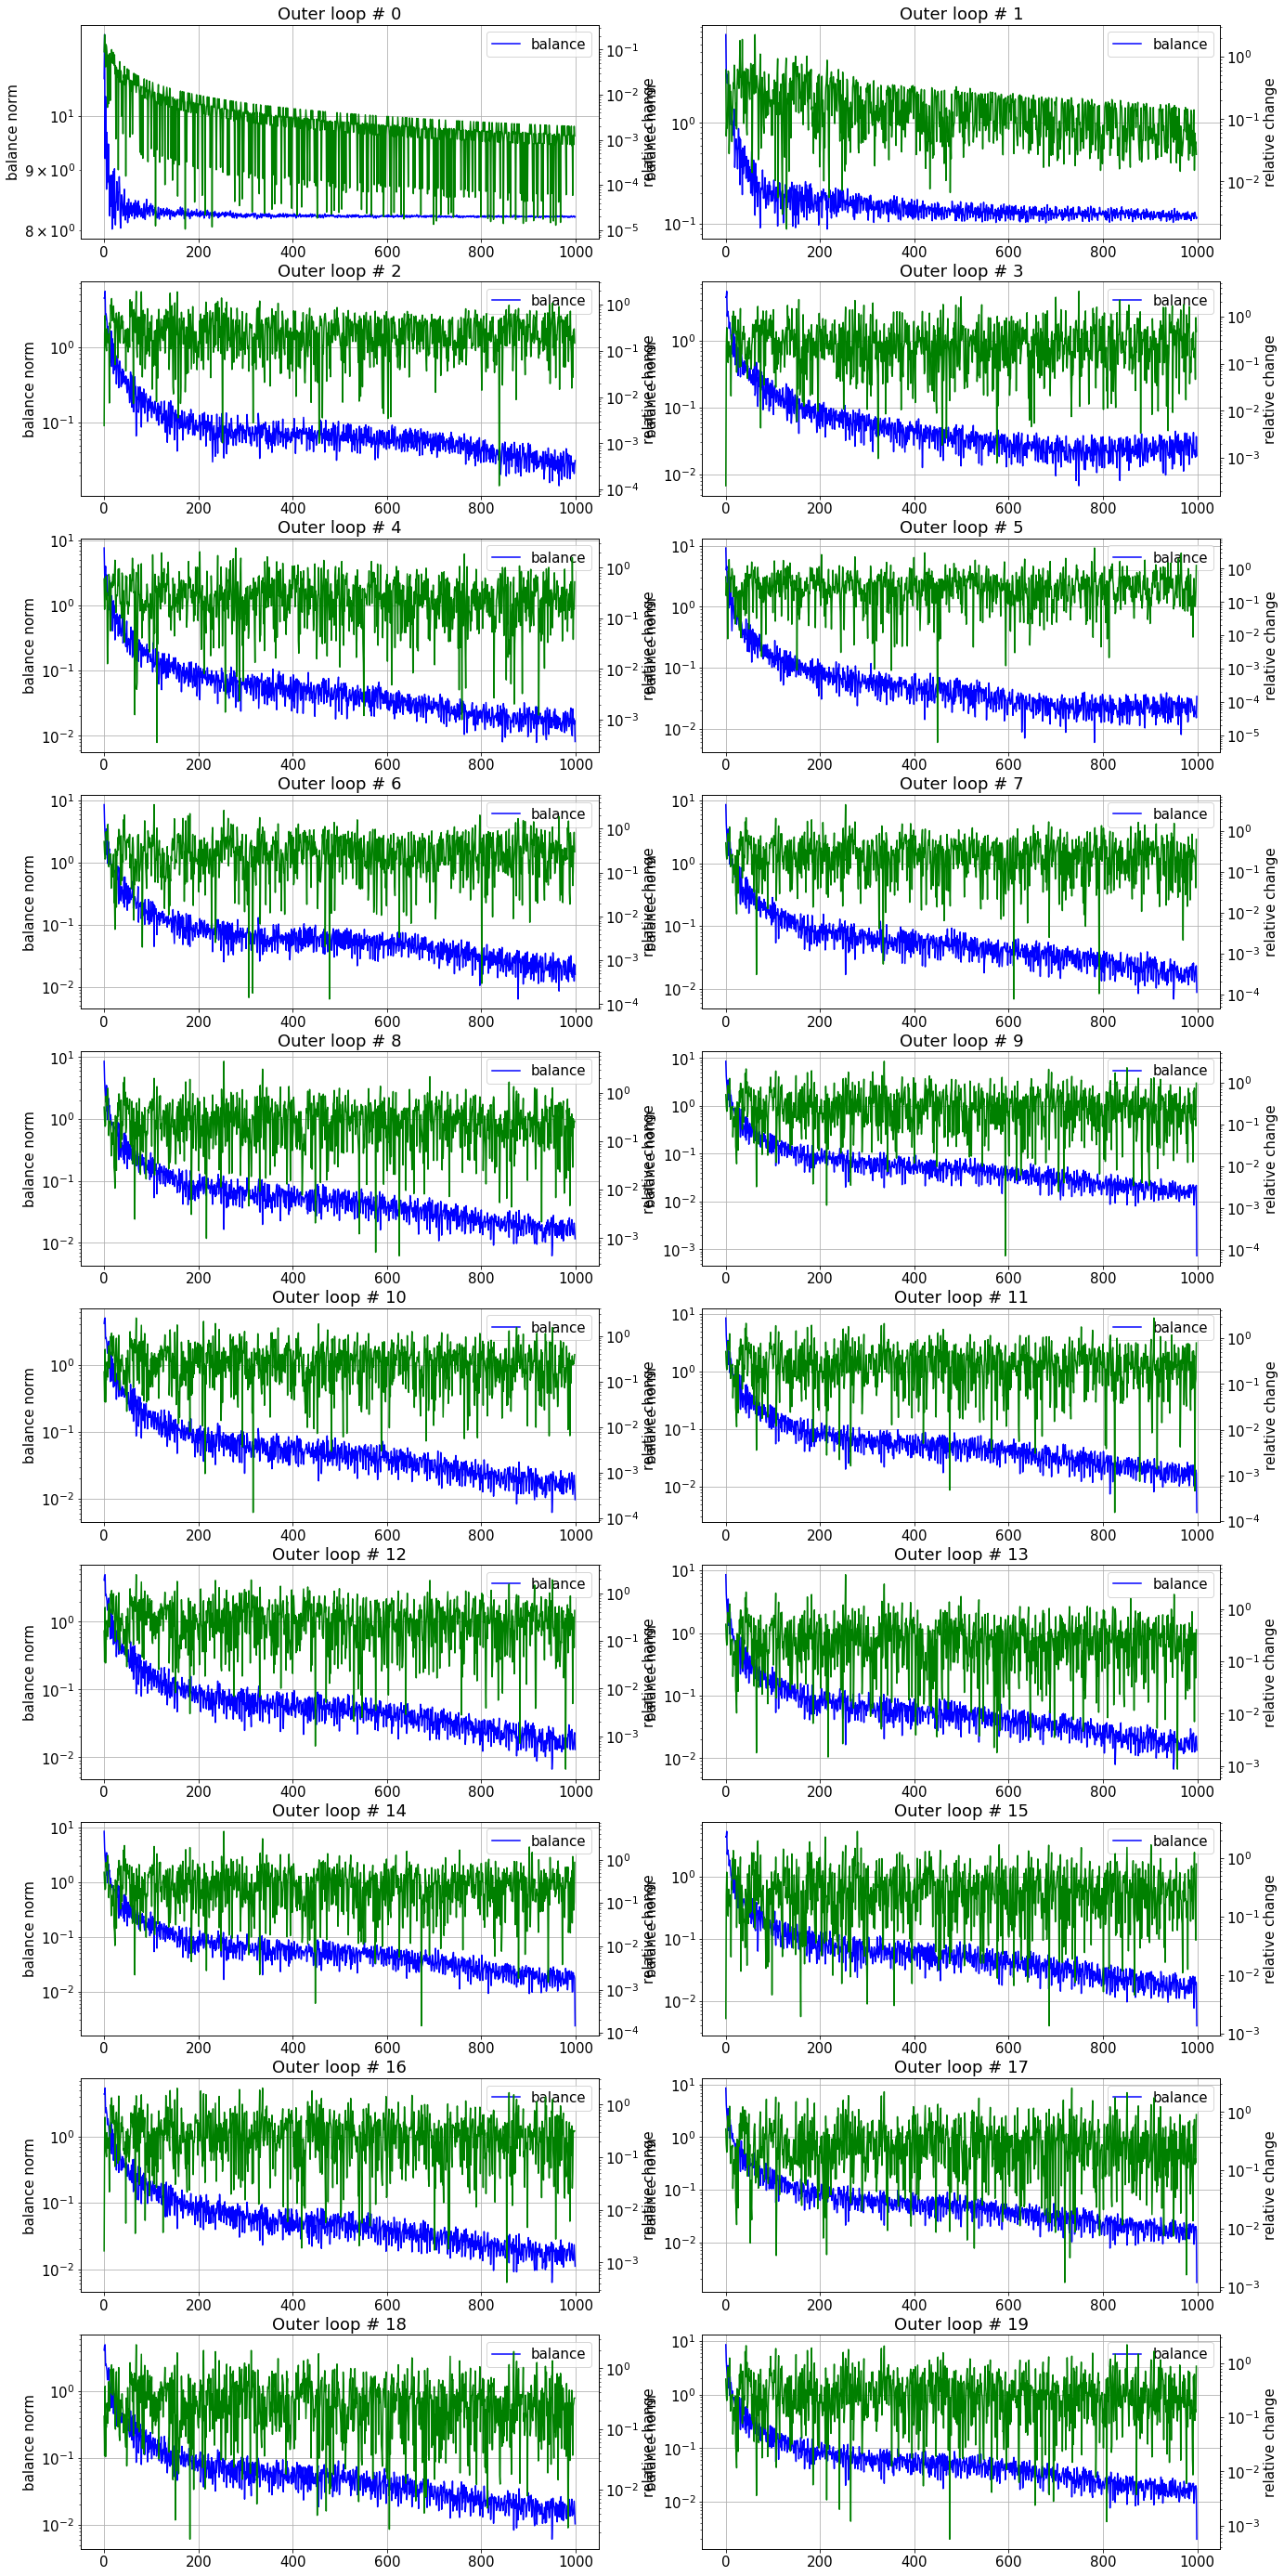

In [58]:
plot_balance_list(balance_list, b_scale='log')

Text(0, 0.5, 'Balance Norm')

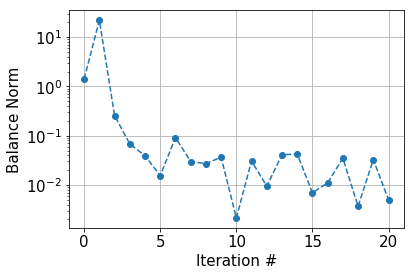

In [61]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')